In [ ]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
accesscm2_pr_file = 'atmos/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc'


In [ ]:
ds = xr.open_dataset(accesscm2_pr_file)
print(ds)

In [ ]:
ds["pr"]

In [ ]:
clim = ds["pr"].mean("time", keep_attrs=True)
clim

In [ ]:
clim.data = clim.data * 86400
clim.attrs["units"] = "mm/day"

print(clim)

In [ ]:
ds2 = ds.groupby(ds.time.dt.season).mean()

In [ ]:
ds2

In [ ]:
ds2.pr.where(ds2.pr.lat>50)

In [ ]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))



clim.plot.contourf(
    ax=ax,
    levels=np.arange(0, 13.5, 1.5),
    extend="max",
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": clim.units}
)
ax.coastlines()

plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = '/data/ibougoudis/MOAD/analysis-ilias/titanic3.csv'


In [4]:
df = pd.read_csv(url, header=0)


In [5]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


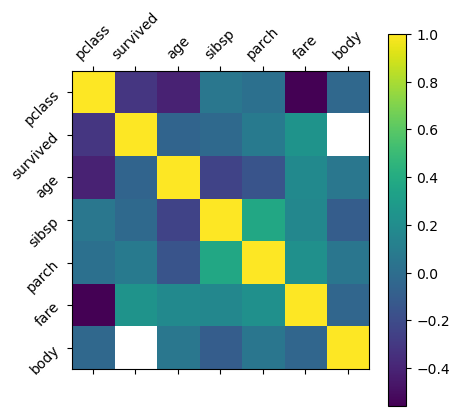

In [22]:
plt.matshow(df.corr(numeric_only=True))
continuous_features = df.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation=45)
plt.yticks(range(len(continuous_features)), continuous_features, rotation=45)
plt.colorbar()
plt.show()

<Axes: >

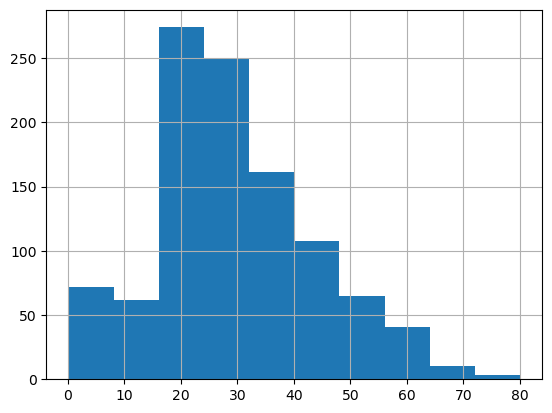

In [14]:
df["age"].hist()

In [16]:
df.corr(numeric_only=True).abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [17]:
df.sort_values("age", ascending=False).head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs"
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,NaN,NaN,NaN
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [21]:
survived_group = df.groupby('survived')
survived_group.mean(numeric_only=True)

,pclass,age,sibsp,parch,fare,body
survived,,,,,,
0,2.500618,30.545363,0.521632,0.328801,23.353831,160.809917
1,1.962000,28.918244,0.462000,0.476000,49.361184,NaN
